# Hands on Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist, cdist

%matplotlib inline

In [2]:
data = pd.read_csv('Cust_Spend_Data.csv')
data.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [3]:
data.shape

(10, 7)

In [4]:
data_attr = data.iloc[:,2:]
data_attr.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3


In [5]:
scaled = data_attr.apply(zscore)
scaled.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033


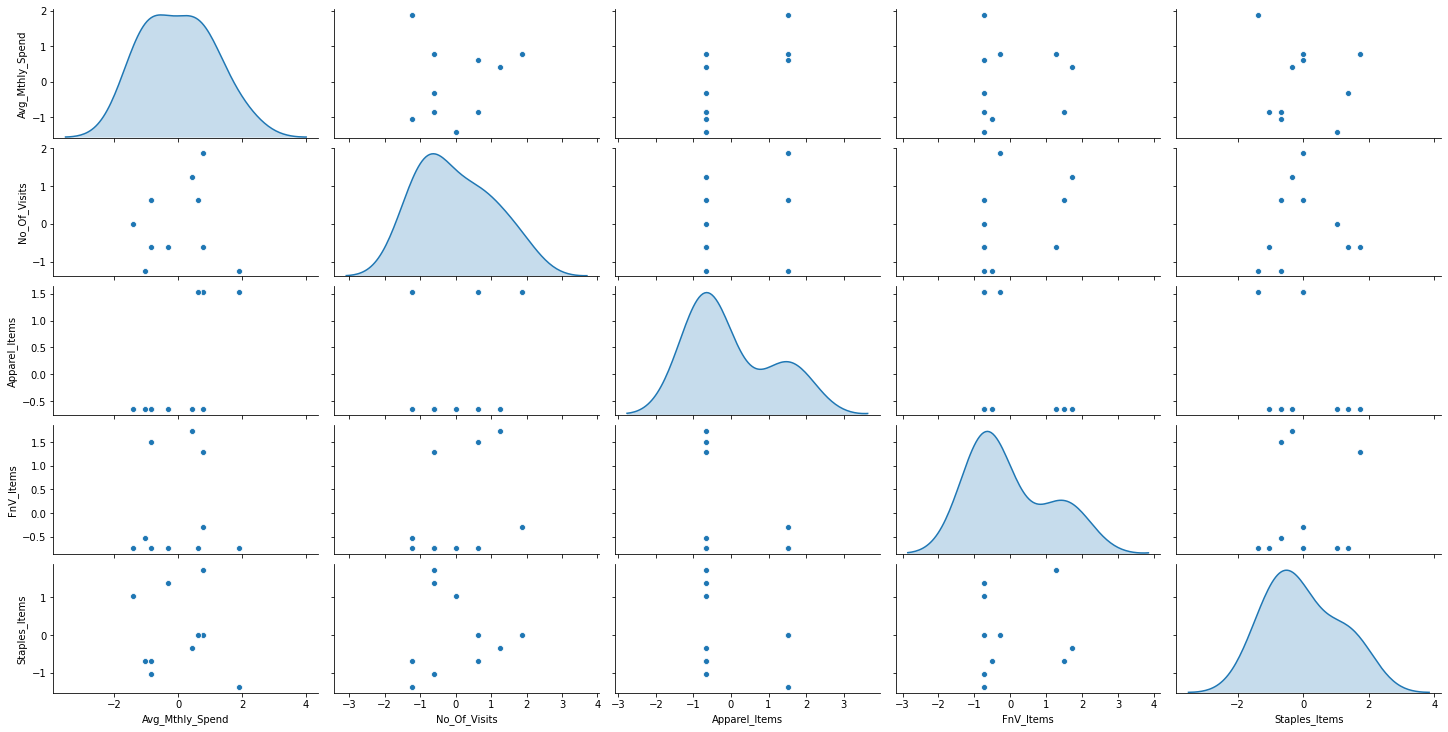

In [6]:
sns.pairplot(scaled, height=2, aspect=2, diag_kind='kde');

In [7]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model.fit(scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [8]:
data_attr['labels'] = model.labels_
data_attr.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
1,7000,3,0,10,9,1
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,1


In [9]:
data_clust = data_attr.groupby(['labels'])
data_clust.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


In [10]:
z = linkage(scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(z, pdist(scaled))

c

0.8681149436293064

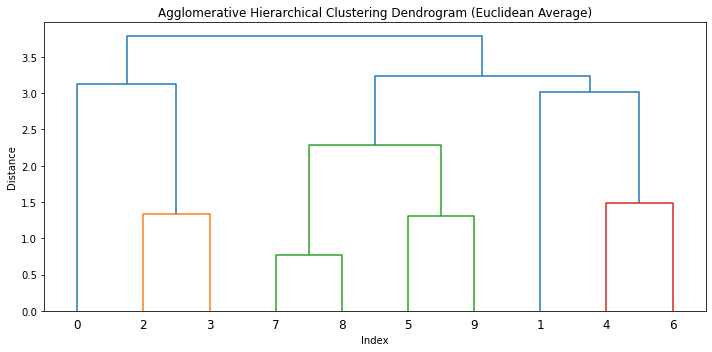

In [11]:
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram (Euclidean Average)')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(z)
plt.tight_layout()

In [12]:
z = linkage(scaled, metric='euclidean', method='single')
c, coph_dists = cophenet(z, pdist(scaled))

c

0.849158357943255

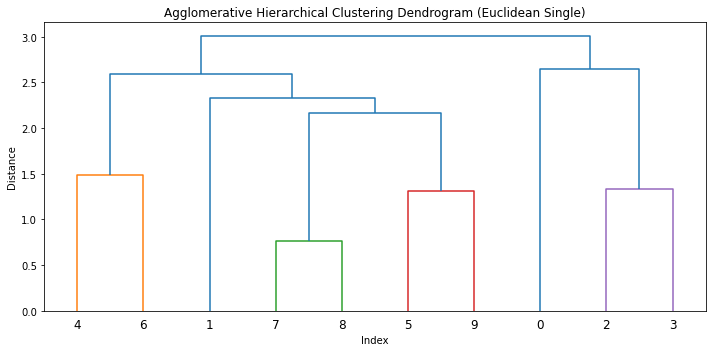

In [13]:
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram (Euclidean Single)')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(z)
plt.tight_layout()

In [14]:
z = linkage(scaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(z, pdist(scaled))

c

0.8606955190809153

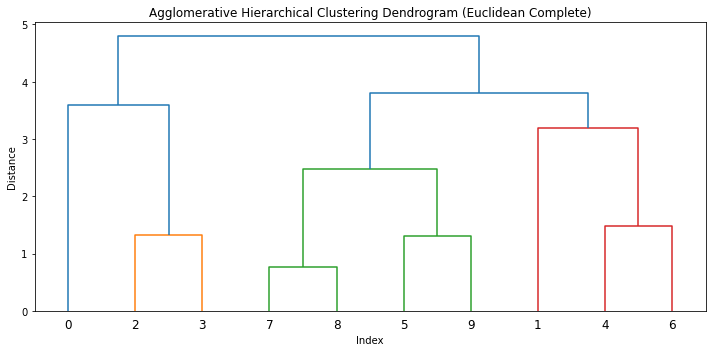

In [15]:
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram (Euclidean Complete)')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(z)
plt.tight_layout()

In [16]:
z = linkage(scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(z, pdist(scaled))

c

0.8453818941339526

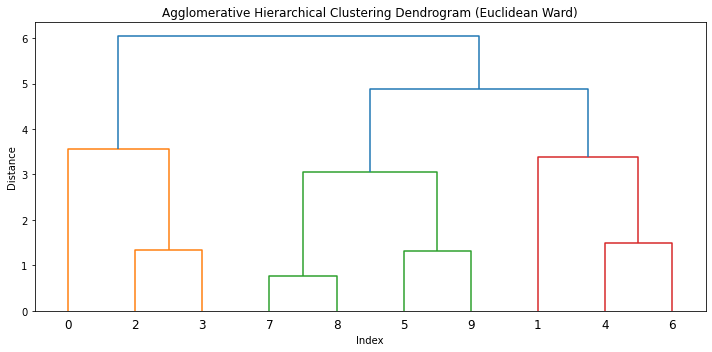

In [17]:
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram (Euclidean Ward)')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(z)
plt.tight_layout()